<table>
 <tr align=left><td><img align=left src="./images/CC-BY.png">
 <td>Text provided under a Creative Commons Attribution license, CC-BY. All code is made available under the FSF-approved MIT license. (c) Kyle T. Mandli</td>
</table>

In [ ]:
from __future__ import print_function

# Introduction to NumPy

[NumPy](https://numpy.org/) is the basic library in Python that defines a number of essential data structures and routines for doing numerical computing (among other things).  Many of the semantics for manipulating the most basic data structure, the `ndarray`, are identical to manipulating `list`s with a few key exceptions. Other commands are similar to matlab commands and work in a similar manner.  We will cover those and some of the other important points when working with NumPy.

Topics:
 - The `ndarray`
 - Mathematical functions
 - Array manipulations
 - Common array functions
 - Math Functions in NumPy

## `ndarray`

The `ndarray` forms the most basic type of data-structure for NumPy.  As the name suggests the `ndarray` is an array that can have as many dimensions as you specify.  For matlab users this should be familiar although note that the `ndarray` does not exactly behave as you might expect the same object to in matlab.  Here are some examples usages:

In [2]:
import numpy

Define a 2x2 array, note that unlike MATLAB we need commas everywhere:

In [3]:
my_array = numpy.array([[1, 2], [3, 4]])
print(my_array)

[[1 2]
 [3 4]]


Get the `(0, 1)` component of the array:

In [4]:
print(my_array)

[[1 2]
 [3 4]]


In [5]:
my_array[0, 1]

2

Fetch the second row of the matrix:

In [6]:
my_array[1,:]

array([3, 4])

Fetch the first column of the matrix:

In [7]:
print(my_array)

[[1 2]
 [3 4]]


In [8]:
my_array[:,0]

array([1, 3])

Define a column vector:

In [9]:
my_vec = numpy.array([[1], [2]])
print(my_vec)

[[1]
 [2]]


Multiply `my_array` by the vector `my_vec` in the usual linear algebra sense (equivalent to MATLAB's `*`)

In [10]:
print(my_array)

[[1 2]
 [3 4]]


In [11]:
print(numpy.dot(my_array, my_vec))

[[ 5]
 [11]]


In [12]:
print(my_array.dot(my_vec))

[[ 5]
 [11]]


Multiply `my_array` and `my_vec` by "broadcasting" the matching dimensions, equivalent to MATLAB's `.*` form:

In [13]:
print(my_array)
print()
print(my_vec)

[[1 2]
 [3 4]]

[[1]
 [2]]


In [14]:
my_array * my_vec

array([[1, 2],
       [6, 8]])

## Common Array Constructors
Along with the most common constructor for `ndarray`s above (`array`) there are number of other ways to create arrays with particular values inserted in them.  Here are a few that can be useful.

The `linspace` command (similar to MATLAB's `linspace` command) take three arguments, the first define a range of values and the third how many points to put in between them.  This is great if you want to evaluate a function at evently space points between two numbers.

In [16]:
print(numpy.linspace(-1, 1, 10))
numpy.linspace?

[-1.         -0.77777778 -0.55555556 -0.33333333 -0.11111111  0.11111111
  0.33333333  0.55555556  0.77777778  1.        ]


Another useful set of functions are `zeros` and `ones` which create an array of zeros and ones respectively (again equivalent to the functions in MATLAB). Note that you can explicitly define the data type.

In [17]:
numpy.zeros([3, 3])

array([[0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.]])

In [18]:
numpy.ones([3, 3, 2], dtype=int)

array([[[1, 1],
        [1, 1],
        [1, 1]],

       [[1, 1],
        [1, 1],
        [1, 1]],

       [[1, 1],
        [1, 1],
        [1, 1]]])

Another common array is the identity matrix. The `identity` command can be used to define an identity matrix of a given dimension.

In [19]:
I = numpy.identity(3)
print(I)

[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]


Note that NumPy arrays can be reshaped and expanded after they are created but this can be computational expense and may be difficult to fully understand the consequences of (`reshape` in particular can be difficult).  One way to avoid these issues is to create an empty array of the right size and storing the calculated values as you find them.  The array constructor to do this is called `empty`:

In [20]:
numpy.empty([2,3])

array([[4.68958968e-310, 0.00000000e+000, 0.00000000e+000],
       [0.00000000e+000, 0.00000000e+000, 0.00000000e+000]])

Note that here the IPython notebook is displaying zeros (or something close to this).  The values are almost always not zero but the display of values is truncated to help with displaying long numbers.  This can be controlled using `%precision 3` where 3 is upto the number of decimal points to display

In [ ]:
%precision 3
numpy.empty([2,3]) + 2

## Array Manipulations
Sometimes, despite our best efforts, we will need to manipulate the size or shape of our already created arrays.
 - Note that these functions can be complex to use and can be computationally expensive so use sparingly!
 - That being said, often these can still be a great way to avoid using too much memory and still may be faster than creating multiple arrays.
 - Check out the [NumPy Docs](http://docs.scipy.org/doc/numpy/reference/routines.array-manipulation.html) for more functions beyond these basic ones

One of the important aspects of an array is its `shape`.

In [21]:
A = numpy.array([[1, 2, 3], [4, 5, 6]])
print(A)

[[1 2 3]
 [4 5 6]]


In [22]:
print("A Shape = ", A.shape)

A Shape =  (2, 3)


We can reshape an array.

In [23]:
B = A.reshape((6,1))
print("A Shape = ", A.shape)
print("B Shape = ", B.shape)
print(B)
#numpy.reshape?  

A Shape =  (2, 3)
B Shape =  (6, 1)
[[1]
 [2]
 [3]
 [4]
 [5]
 [6]]


Take the matrix `A` and make a larger matrix by tiling the old one the number of times specified.

In [24]:
A

array([[1, 2, 3],
       [4, 5, 6]])

In [26]:
B=numpy.tile(A, (2,3))
print(B.shape)

(4, 9)


In [27]:
A.flatten()

array([1, 2, 3, 4, 5, 6])

## Array Operations

The numpy library also includes a number of basic operations on arrays. For example, a common operation is to determine the transpose of an array.

In [28]:
B = numpy.array([[1,2,3],[1,4,9],[1,8,27]])
print(B)

[[ 1  2  3]
 [ 1  4  9]
 [ 1  8 27]]


In [30]:
print(B.transpose())
B.mean()

[[ 1  1  1]
 [ 2  4  8]
 [ 3  9 27]]


6.222222222222222

One nice aspect of the numpy libary is that scalar multiplication is defined in the usual way.

In [31]:
v = numpy.array([[1],[2],[3]])
print(v)

[[1]
 [2]
 [3]]


In [32]:
print(2*v)

[[2]
 [4]
 [6]]


Another common operation is to multiply two arrays. Be careful to make sure that an operation is defined. In the example below the operation that is commented out is not defined. You should uncomment the line and execute the commands. It is important to learn how to read and interpret error messages.

In [34]:
A = numpy.array([[1],[-1],[1]])
B = numpy.array([[1,2,3],[1,4,9],[1,8,27]])
print(numpy.matmul(B,A))
print(numpy.matmul(A.transpose(),B))
print(numpy.matmul(A,B))

[[ 2]
 [ 6]
 [20]]
[[ 1  6 21]]


ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 3 is different from 1)

Note:  Matrix-Matrix (and by extension Matrix-vector) multiplication can also be done using the array method `dot`

In [35]:
 print(B.dot(A))
print(A.transpose().dot(B))

[[ 2]
 [ 6]
 [20]]
[[ 1  6 21]]


An element within an array can be changed using the same notation above that is used to get the value of an entry within an array.

In [36]:
B = numpy.array([[1,2,3],[1,4,9],[1,8,27]])
print(B)

[[ 1  2  3]
 [ 1  4  9]
 [ 1  8 27]]


In [37]:
B[0,0] = -5
print(B)

[[-5  2  3]
 [ 1  4  9]
 [ 1  8 27]]


or even whole slices or sub-arrays can be changed

In [38]:
B[:,1] = numpy.array([1, 2, 3])
print(B)

[[-5  1  3]
 [ 1  2  9]
 [ 1  3 27]]


## Mathematical Functions
Similar to the built-in Python module `math`, NumPy also provides a number of common math functions such as `sqrt`, `sin`, `cos`, and `tan` along with a number of useful constants, the most important of which is $\pi$.  The benefit of using NumPy's versions is that they can be used on entire arrays.

In [39]:
x = numpy.linspace(-2.0 * numpy.pi, 2.0 * numpy.pi, 62)
print(x)

[-6.28318531 -6.07717923 -5.87117316 -5.66516708 -5.459161   -5.25315493
 -5.04714885 -4.84114278 -4.6351367  -4.42913063 -4.22312455 -4.01711848
 -3.8111124  -3.60510632 -3.39910025 -3.19309417 -2.9870881  -2.78108202
 -2.57507595 -2.36906987 -2.16306379 -1.95705772 -1.75105164 -1.54504557
 -1.33903949 -1.13303342 -0.92702734 -0.72102126 -0.51501519 -0.30900911
 -0.10300304  0.10300304  0.30900911  0.51501519  0.72102126  0.92702734
  1.13303342  1.33903949  1.54504557  1.75105164  1.95705772  2.16306379
  2.36906987  2.57507595  2.78108202  2.9870881   3.19309417  3.39910025
  3.60510632  3.8111124   4.01711848  4.22312455  4.42913063  4.6351367
  4.84114278  5.04714885  5.25315493  5.459161    5.66516708  5.87117316
  6.07717923  6.28318531]


In [42]:
y = numpy.sin(x)
print(y)
import math
print(math.sin(x))

[ 2.44929360e-16  2.04552066e-01  4.00453906e-01  5.79421098e-01
  7.33885366e-01  8.57314628e-01  9.44489229e-01  9.91722674e-01
  9.97017526e-01  9.60149874e-01  8.82678798e-01  7.67880446e-01
  6.20609482e-01  4.47093793e-01  2.54671120e-01  5.14787548e-02
 -1.53890577e-01 -3.52752087e-01 -5.36696194e-01 -6.97944155e-01
 -8.29677014e-01 -9.26323968e-01 -9.83797952e-01 -9.99668468e-01
 -9.73264374e-01 -9.05702263e-01 -7.99839245e-01 -6.60152121e-01
 -4.92548068e-01 -3.04114832e-01 -1.02820997e-01  1.02820997e-01
  3.04114832e-01  4.92548068e-01  6.60152121e-01  7.99839245e-01
  9.05702263e-01  9.73264374e-01  9.99668468e-01  9.83797952e-01
  9.26323968e-01  8.29677014e-01  6.97944155e-01  5.36696194e-01
  3.52752087e-01  1.53890577e-01 -5.14787548e-02 -2.54671120e-01
 -4.47093793e-01 -6.20609482e-01 -7.67880446e-01 -8.82678798e-01
 -9.60149874e-01 -9.97017526e-01 -9.91722674e-01 -9.44489229e-01
 -8.57314628e-01 -7.33885366e-01 -5.79421098e-01 -4.00453906e-01
 -2.04552066e-01 -2.44929

TypeError: only size-1 arrays can be converted to Python scalars

This is often useful for plotting functions easily or setting up a problem (we will cover plotting later).

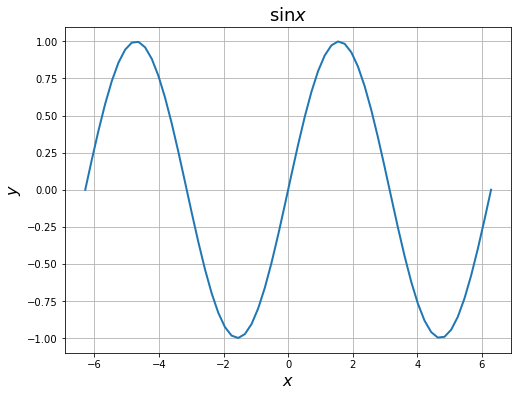

In [41]:
import matplotlib.pyplot as plt
%matplotlib inline

fig = plt.figure(figsize=(8,6))
plt.plot(x,y,linewidth=2)
plt.grid()
plt.xlabel('$x$',fontsize=16)
plt.ylabel('$y$',fontsize=16)
plt.title('$\sin{x}$',fontsize=18)
plt.show()

One thing to watch out for (and this is true of the `math` module) is that contrary to what you might expect:

In [43]:
x = numpy.linspace(-1, 1, 20)
print(x)

[-1.         -0.89473684 -0.78947368 -0.68421053 -0.57894737 -0.47368421
 -0.36842105 -0.26315789 -0.15789474 -0.05263158  0.05263158  0.15789474
  0.26315789  0.36842105  0.47368421  0.57894737  0.68421053  0.78947368
  0.89473684  1.        ]


In [44]:
numpy.sqrt(x)

<ipython-input-44-b37ca7c394f7>:1: RuntimeWarning: invalid value encountered in sqrt
  numpy.sqrt(x)


array([       nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
       0.22941573, 0.39735971, 0.51298918, 0.60697698, 0.6882472 ,
       0.76088591, 0.82717019, 0.88852332, 0.9459053 , 1.        ])

The problem is that if you take the `sqrt` of a negative number NumPy does not automatically use the `Complex` variable type to represent the output.  Unlike lists, NumPy requires the data stored within to be uniform (of the same type or record structure).  By default NumPy assumes we want `float`s which obey the IEEE compliant floating point rules for arithmetic (more on this later) and generates `nan`s instead (`nan` stands for "not-a-number", see more about this special value [here]()).

If we want to deal with complex numbers there is still a way to tell NumPy that we want the `Complex` data type instead by doing the following:

In [46]:
x = numpy.linspace(-1, 1, 20, dtype=complex)
numpy.sqrt(x)
print(x)

[-1.        +0.j -0.89473684+0.j -0.78947368+0.j -0.68421053+0.j
 -0.57894737+0.j -0.47368421+0.j -0.36842105+0.j -0.26315789+0.j
 -0.15789474+0.j -0.05263158+0.j  0.05263158+0.j  0.15789474+0.j
  0.26315789+0.j  0.36842105+0.j  0.47368421+0.j  0.57894737+0.j
  0.68421053+0.j  0.78947368+0.j  0.89473684+0.j  1.        +0.j]


There are number of other data types that NumPy understands, the most m  important one being `int` for integers.